In [ ]:
img = "synthetic_images/img_0000.png"
label = "synthetic_labels/img_0000.txt"


In [15]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

In [16]:
# Function to plot a single image with its bounding box
def plot_image_with_bbox(ax, img_path, label_path):
    # Open the image
    image = Image.open(img_path)

    # Read the YOLO label
    with open(label_path, "r") as f:
        label = f.readline().strip().split()
        class_id, x_center, y_center, w, h = map(float, label)

    # Convert normalized YOLO coordinates to pixel coordinates
    image_width, image_height = image.size
    x_center *= image_width
    y_center *= image_height
    w *= image_width
    h *= image_height

    # Calculate the top-left corner of the bounding box
    x_min = x_center - w / 2
    y_min = y_center - h / 2

    # Plot the image
    ax.imshow(image)
    ax.axis("off")  # Hide axes

    # Add the bounding box
    rect = patches.Rectangle(
        (x_min, y_min), w, h, linewidth=2, edgecolor="red", facecolor="none"
    )
    ax.add_patch(rect)

# Display 9 images in a 3x3 grid
def display_images_in_grid(image_dir, label_dir, start_index=0):
    fig, axes = plt.subplots(3, 3, figsize=(12, 12))
    axes = axes.flatten()

    for i in range(9):
        img_path = f"{image_dir}/img_{start_index + i:04d}.png"
        label_path = f"{label_dir}/img_{start_index + i:04d}.txt"

        try:
            plot_image_with_bbox(axes[i], img_path, label_path)
        except Exception as e:
            print(f"Error loading {img_path} or {label_path}: {e}")
            axes[i].axis("off")  # Hide the subplot if there's an error

    plt.tight_layout()
    plt.show()

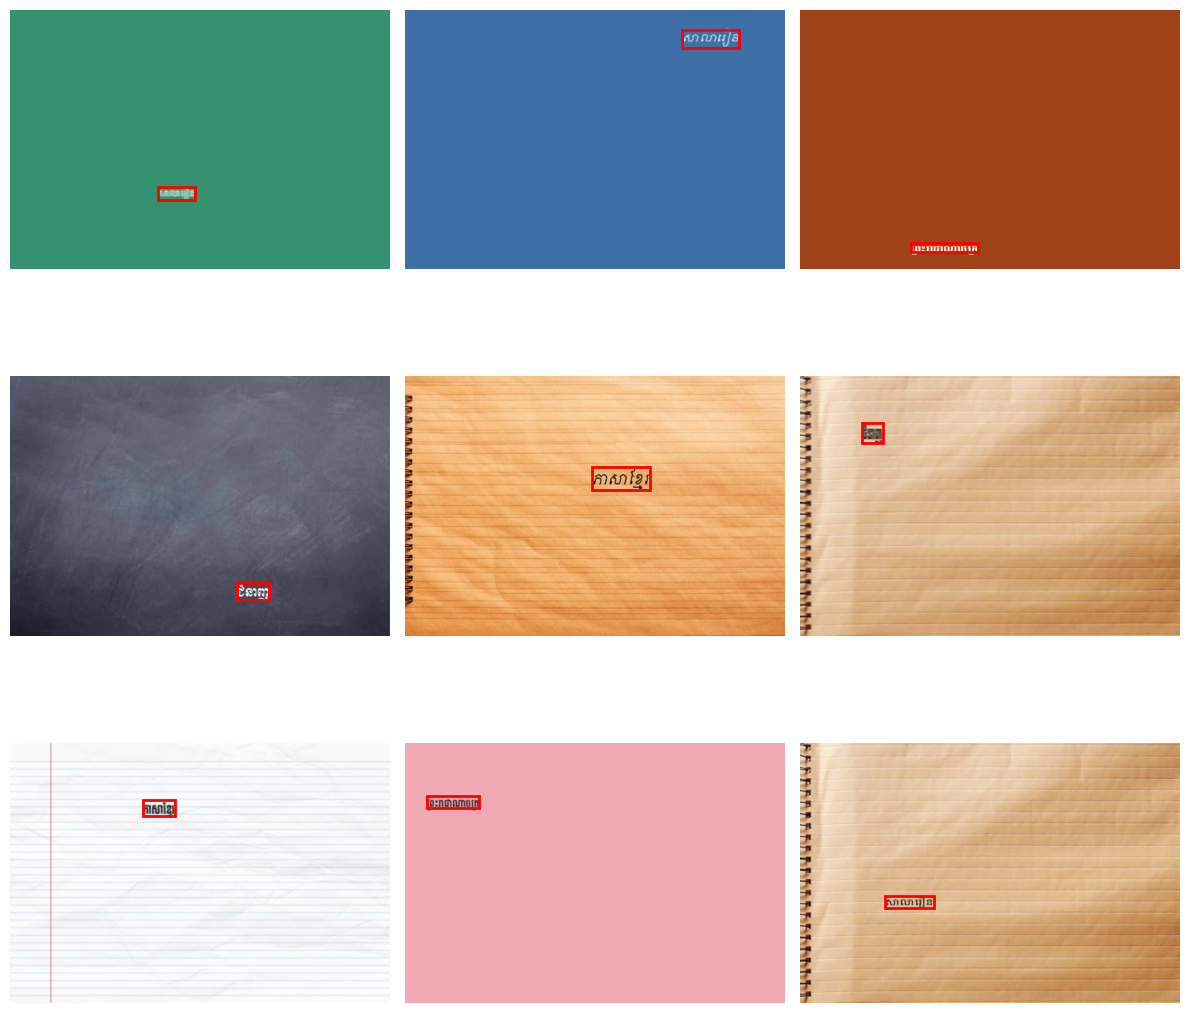

In [17]:
# Example usage
image_dir = "synthetic_images"
label_dir = "synthetic_labels"
display_images_in_grid(image_dir, label_dir, start_index=0)